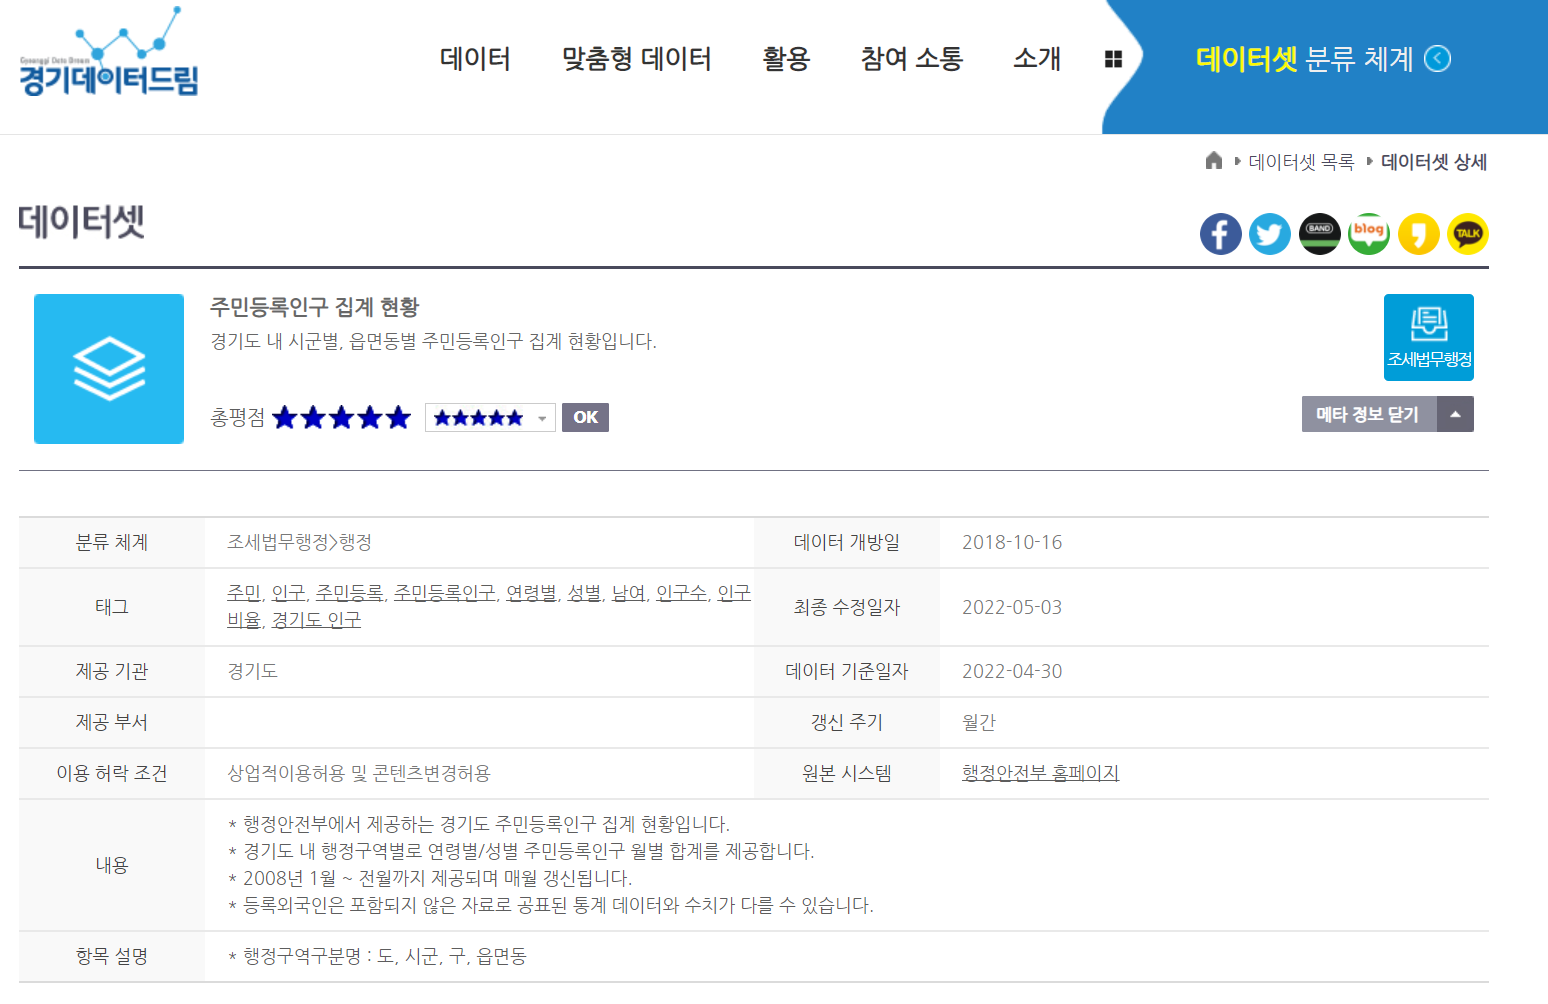

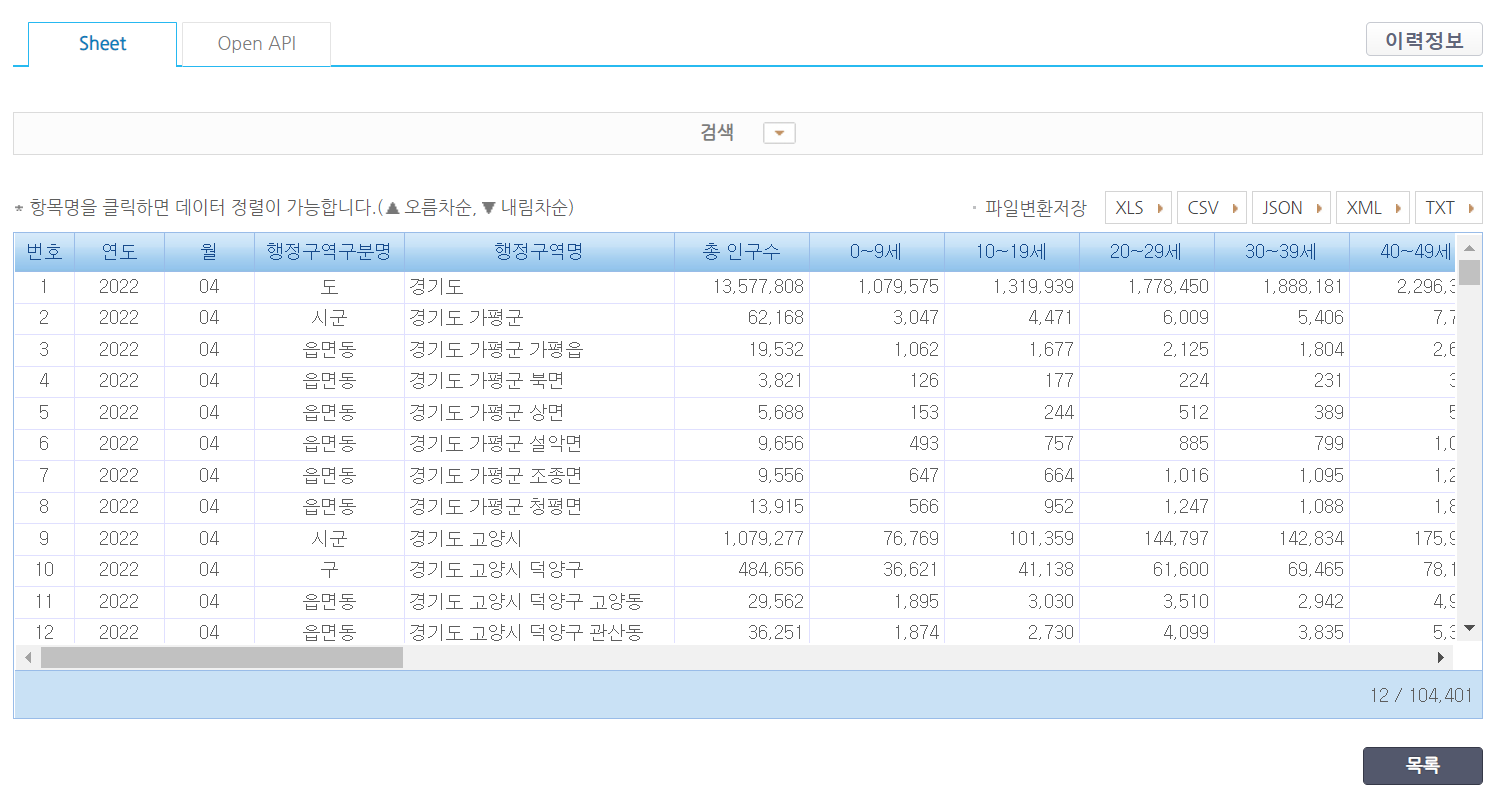

https://data.gg.go.kr/portal/data/service/selectServicePage.do?page=1&rows=10&sortColumn=&sortDirection=&infId=HH7N68ZBMYNCB7QE9OY927342034&infSeq=1&order=&loc=&searchWord=%EC%A3%BC%EB%AF%BC%EB%93%B1%EB%A1%9D%EC%9D%B8%EA%B5%AC+%EC%A7%91%EA%B3%84+%ED%98%84%ED%99%A9

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,924 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# plt.rc('font', family='Malgun Gothic')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


In [ ]:
# 경기도 인구파일 불러오기
filepath = '/content/gdrive/My Drive/길벗_소스코드/1장/data/'
population = pd.read_csv(filepath + "경기도_주민등록인구집계현황_2022_05.csv", encoding='euc-kr')
population.head(2)

,연도,월,행정구역구분명,행정구역명,총 인구수,0~9세,10~19세,20~29세,30~39세,40~49세,...,10~19세 (여),20~29세 (여),30~39세 (여),40~49세 (여),50~59세 (여),60~69세 (여),70~79세 (여),80~89세 (여),90~99세 (여),100세 이상 (여)
0,2022,4,도,경기도,13577808,1079575,1319939,1778450,1888181,2296320,...,642579,840955,909295,1128097,1128189,853815,426163,242934,43233,1453
1,2022,4,시군,경기도 가평군,62168,3047,4471,6009,5406,7722,...,2175,2520,2449,3575,5177,6376,3551,2379,395,15


In [ ]:
print("데이터 크기 :", population.shape)

데이터 크기 : (104401, 40)


In [ ]:
#결측치 확인
population.isnull().sum()

연도             0
월              0
행정구역구분명        0
행정구역명          0
총 인구수          0
0~9세           0
10~19세         0
20~29세         0
30~39세         0
40~49세         0
50~59세         0
60~69세         0
70~79세         0
80~89세         0
90~99세         0
100세 이상        0
총 인구수 (남)      0
0~9세 (남)       0
10~19세 (남)     0
20~29세 (남)     0
30~39세 (남)     0
40~49세 (남)     0
50~59세 (남)     0
60~69세 (남)     0
70~79세 (남)     0
80~89세 (남)     0
90~99세 (남)     0
100세 이상 (남)    0
총 인구수 (여)      0
0~9세 (여)       0
10~19세 (여)     0
20~29세 (여)     0
30~39세 (여)     0
40~49세 (여)     0
50~59세 (여)     0
60~69세 (여)     0
70~79세 (여)     0
80~89세 (여)     0
90~99세 (여)     0
100세 이상 (여)    0
dtype: int64

In [ ]:
# 경험상 젊은 여성들이 많은 곳이 활기 넘치는 곳이었습니다. 맘카페 등등
popula_female = population.iloc[:,-12:]
popula_info = population.iloc[:,:4]
pop_female_info = pd.concat([popula_info, popula_female], axis=1)

In [ ]:
pop_female_info.head(3)

,연도,월,행정구역구분명,행정구역명,총 인구수 (여),0~9세 (여),10~19세 (여),20~29세 (여),30~39세 (여),40~49세 (여),50~59세 (여),60~69세 (여),70~79세 (여),80~89세 (여),90~99세 (여),100세 이상 (여)
0,2022,4,도,경기도,6743949,527236,642579,840955,909295,1128097,1128189,853815,426163,242934,43233,1453
1,2022,4,시군,경기도 가평군,30122,1510,2175,2520,2449,3575,5177,6376,3551,2379,395,15
2,2022,4,읍면동,경기도 가평군 가평읍,9601,517,784,959,845,1245,1590,1792,1013,732,117,7


In [ ]:
# 2022년은 분석에서 제외
pop_female_info['연도'].value_counts().sort_index() 

2008    8066
2009    7088
2010    7100
2011    7140
2012    7169
2013    7195
2014    7246
2015    7307
2016    7326
2017    7300
2018    7335
2019    7214
2020    7167
2021    7276
2022    2472
Name: 연도, dtype: int64

In [ ]:
pop_female_info = pop_female_info[pop_female_info['연도']!=2022]

In [ ]:
pop_female_info.rename(columns={"0~9세 (여)":"10대_미만",
                                "10~19세 (여)":"10대",
                                "20~29세 (여)":"20대",
                                "30~39세 (여)":"30대",
                                "40~49세 (여)":"40대",
                                "50~59세 (여)":"50대",
                                "60~69세 (여)":"60대"
                                }, inplace=True) 

In [ ]:
pop_female_info['70대_이상']=pop_female_info["70~79세 (여)"]+pop_female_info["80~89세 (여)"]+\
pop_female_info["90~99세 (여)"] + pop_female_info["100세 이상 (여)"]

In [ ]:
pop_female_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101929 entries, 2472 to 104400
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   연도           101929 non-null  int64 
 1   월            101929 non-null  int64 
 2   행정구역구분명      101929 non-null  object
 3   행정구역명        101929 non-null  object
 4   총 인구수 (여)    101929 non-null  int64 
 5   10대_미만       101929 non-null  int64 
 6   10대          101929 non-null  int64 
 7   20대          101929 non-null  int64 
 8   30대          101929 non-null  int64 
 9   40대          101929 non-null  int64 
 10  50대          101929 non-null  int64 
 11  60대          101929 non-null  int64 
 12  70~79세 (여)   101929 non-null  int64 
 13  80~89세 (여)   101929 non-null  int64 
 14  90~99세 (여)   101929 non-null  int64 
 15  100세 이상 (여)  101929 non-null  int64 
 16  70대_이상       101929 non-null  int64 
dtypes: int64(15), object(2)
memory usage: 14.0+ MB


In [ ]:
df_female = pop_female_info.drop(['70~79세 (여)', '80~89세 (여)', '90~99세 (여)','100세 이상 (여)'], axis=1)

In [ ]:
df_female.head(2)

,연도,월,행정구역구분명,행정구역명,총 인구수 (여),10대_미만,10대,20대,30대,40대,50대,60대,70대_이상
2472,2021,12,도,경기도,6738152,537188,642942,850446,916828,1127941,1122217,839319,701271
2473,2021,12,시군,경기도 가평군,30135,1579,2137,2560,2494,3589,5219,6290,6267


In [ ]:
"""행정구역이 동으로 분류되는 통계만 찾아보자"""
df_female_dong=df_female[df_female['행정구역명'].str.contains('동')]
df_female_dong.head()

,연도,월,행정구역구분명,행정구역명,총 인구수 (여),10대_미만,10대,20대,30대,40대,50대,60대,70대_이상
2482,2021,12,읍면동,경기도 고양시 덕양구 고양동,14790,978,1460,1605,1483,2476,2463,2183,2142
2483,2021,12,읍면동,경기도 고양시 덕양구 관산동,17991,953,1323,1903,1797,2594,3428,3158,2835
2484,2021,12,읍면동,경기도 고양시 덕양구 능곡동,7460,383,539,932,797,1086,1534,1158,1031
2485,2021,12,읍면동,경기도 고양시 덕양구 대덕동,1025,42,58,161,99,118,167,187,193
2486,2021,12,읍면동,경기도 고양시 덕양구 삼송동,13198,1289,832,1521,2478,2152,1956,1618,1352


In [ ]:
df_female_dong.shape

(71478, 13)

In [ ]:
# 40대 이하 비율 (%)과 50대 이상 비율(%) 구하기
under40s = df_female_dong['10대_미만']+df_female_dong['10대']+df_female_dong['20대']+df_female_dong['30대']+df_female_dong['40대']
over50s = df_female_dong['50대']+df_female_dong['60대']+df_female_dong['70대_이상']

under40_percent = round((under40s / df_female_dong['총 인구수 (여)']) * 100, 2)
over50_percent = round((over50s / df_female_dong['총 인구수 (여)']) * 100, 2)

In [ ]:
df_female_dong['40대_이하_여성비율(%)'] = under40_percent
df_female_dong['50대_이상_여성비율(%)'] = over50_percent

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_female_dong.head(2)

,연도,월,행정구역구분명,행정구역명,총 인구수 (여),10대_미만,10대,20대,30대,40대,50대,60대,70대_이상,40대_이하_여성비율(%),50대_이상_여성비율(%)
2482,2021,12,읍면동,경기도 고양시 덕양구 고양동,14790,978,1460,1605,1483,2476,2463,2183,2142,54.10,45.90
2483,2021,12,읍면동,경기도 고양시 덕양구 관산동,17991,953,1323,1903,1797,2594,3428,3158,2835,47.63,52.37


In [ ]:
df_female_dong['동'] = df_female_dong['행정구역명'].apply(lambda x:x.split()[-1])
df_female_dong['시'] = df_female_dong['행정구역명'].apply(lambda x:x.split()[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# split() 설명
x = "경기도 고양시 덕양구 고양동"
print("split() 적용 전 :",x)
print("split() 적용 후 :",x.split())

split() 적용 전 : 경기도 고양시 덕양구 고양동
split() 적용 후 : ['경기도', '고양시', '덕양구', '고양동']


In [ ]:
df_female_dong.sample()

,연도,월,행정구역구분명,행정구역명,총 인구수 (여),10대_미만,10대,20대,30대,40대,50대,60대,70대_이상,40대_이하_여성비율(%),50대_이상_여성비율(%),동,시
46294,2015,12,읍면동,경기도 성남시 분당구 야탑2동,9364,718,1026,1299,1377,1609,1544,925,866,64.38,35.62,야탑2동,성남시


In [ ]:
df_female_dong['시-동'] = df_female_dong['시']+ " " +df_female_dong['동']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_result = df_female_dong[['연도','시','동','시-동','총 인구수 (여)','40대_이하_여성비율(%)', '50대_이상_여성비율(%)']]

In [ ]:
# 데이터 결과
df_result['40대_이하_여성비율(%)'].unique()

array([54.1 , 47.63, 50.09, ..., 87.31, 84.9 , 87.81])

In [ ]:
df_result.isnull().sum()

연도                 0
시                  0
동                  0
시-동                0
총 인구수 (여)          0
40대_이하_여성비율(%)    32
50대_이상_여성비율(%)    32
dtype: int64

In [ ]:
# 결측치를 눈으로 확인하는 단계
df_result[df_result['40대_이하_여성비율(%)'].isnull()]

,연도,시,동,시-동,총 인구수 (여),40대_이하_여성비율(%),50대_이상_여성비율(%)
3082,2021,화성시동부출장소,화성시동부출장소,화성시동부출장소 화성시동부출장소,0,NaN,NaN
3083,2021,화성시동탄출장소,화성시동탄출장소,화성시동탄출장소 화성시동탄출장소,0,NaN,NaN
3693,2021,화성시동부출장소,화성시동부출장소,화성시동부출장소 화성시동부출장소,0,NaN,NaN
3694,2021,화성시동탄출장소,화성시동탄출장소,화성시동탄출장소 화성시동탄출장소,0,NaN,NaN
4302,2021,화성시동부출장소,화성시동부출장소,화성시동부출장소 화성시동부출장소,0,NaN,NaN
4303,2021,화성시동탄출장소,화성시동탄출장소,화성시동탄출장소 화성시동탄출장소,0,NaN,NaN
4766,2021,용인시,역삼동,용인시 역삼동,0,NaN,NaN
4911,2021,화성시동부출장소,화성시동부출장소,화성시동부출장소 화성시동부출장소,0,NaN,NaN
4912,2021,화성시동탄출장소,화성시동탄출장소,화성시동탄출장소 화성시동탄출장소,0,NaN,NaN
5516,2021,화성시동부출장소,화성시동부출장소,화성시동부출장소 화성시동부출장소,0,NaN,NaN


In [ ]:
df_result.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_result.sample(3)

,연도,시,동,시-동,총 인구수 (여),40대_이하_여성비율(%),50대_이상_여성비율(%)
61733,2013,의정부시,의정부3동,의정부시 의정부3동,7053,59.00,41.00
58101,2014,용인시,유림동,용인시 유림동,16193,76.16,23.84
97730,2008,성남시,신촌동,성남시 신촌동,1855,76.87,23.13


In [ ]:
# 최근 5년 동안 대상 (2016 ~ 2021년)
df_resent = df_result[df_result['연도']>2015]

In [ ]:
df_resent.sample()

,연도,시,동,시-동,총 인구수 (여),40대_이하_여성비율(%),50대_이상_여성비율(%)
35757,2017,고양시,장항1동,고양시 장항1동,1354,45.94,54.06


In [ ]:
df_resent_group = df_resent.groupby(['시-동'])['40대_이하_여성비율(%)', "50대_이상_여성비율(%)"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_resent_group.reset_index(inplace=True)

In [ ]:
df_resent_group.sort_values(by='40대_이하_여성비율(%)', ascending=False)[:20]

,시-동,40대_이하_여성비율(%),50대_이상_여성비율(%)
474,화성시 동탄4동,85.645833,14.354167
471,화성시 동탄1동,83.195833,16.804167
473,화성시 동탄3동,82.473611,17.526389
477,화성시 동탄7동,81.555000,18.445000
483,화성시 새솔동,81.477708,18.522292
476,화성시 동탄6동,81.381458,18.618542
478,화성시 동탄8동,81.288148,18.711852
267,시흥시 배곧동,81.220000,18.780000
266,시흥시 배곧2동,80.545000,19.455000
216,수원시 광교1동,80.375694,19.624306


In [ ]:
df_top20 = df_resent_group.sort_values(by='40대_이하_여성비율(%)', ascending=False)[:20]

In [ ]:
x = df_top20['시-동']
y = df_top20['40대_이하_여성비율(%)']

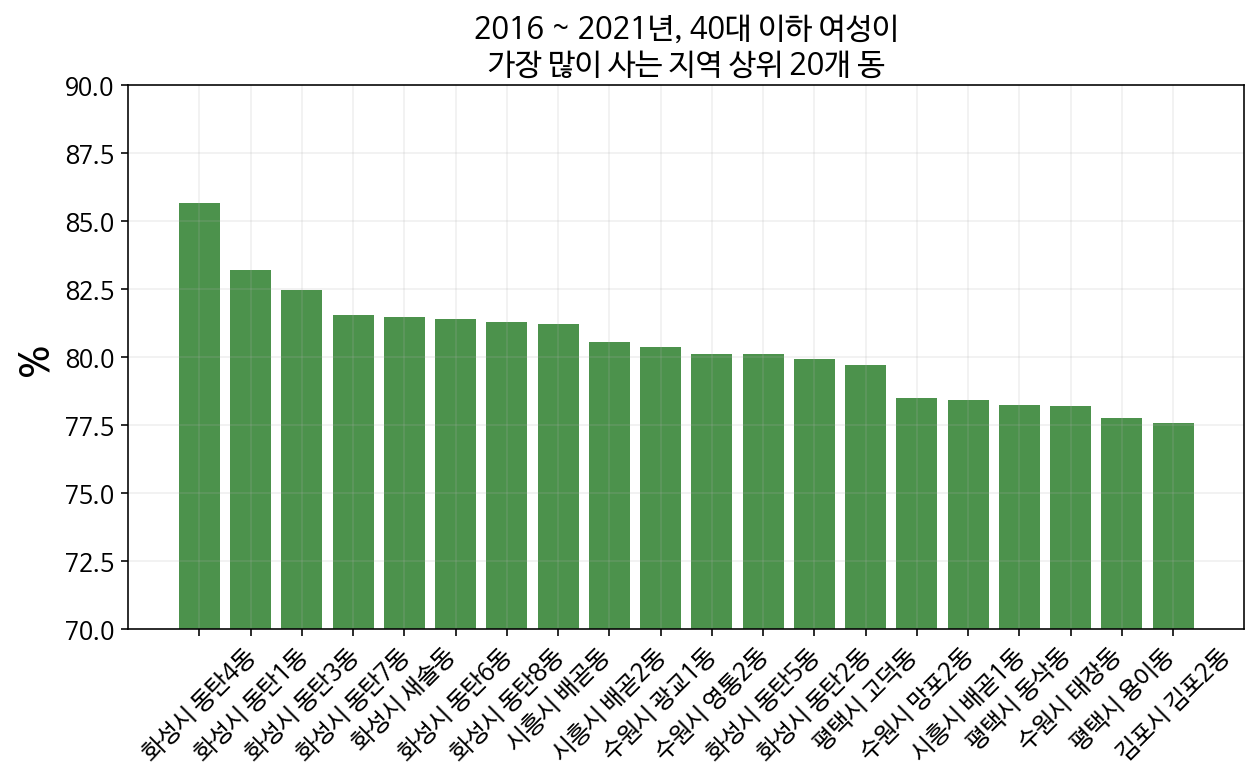

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("2016 ~ 2021년, 40대 이하 여성이\n가장 많이 사는 지역 상위 20개 동", fontsize=15)
plt.bar(x, y, alpha=0.7, color='darkgreen')
plt.xticks(size=12, rotation=45)
plt.yticks(size=12)
plt.ylim(70,90)
plt.ylabel('%', size=20)
plt.grid(True, alpha=0.2)

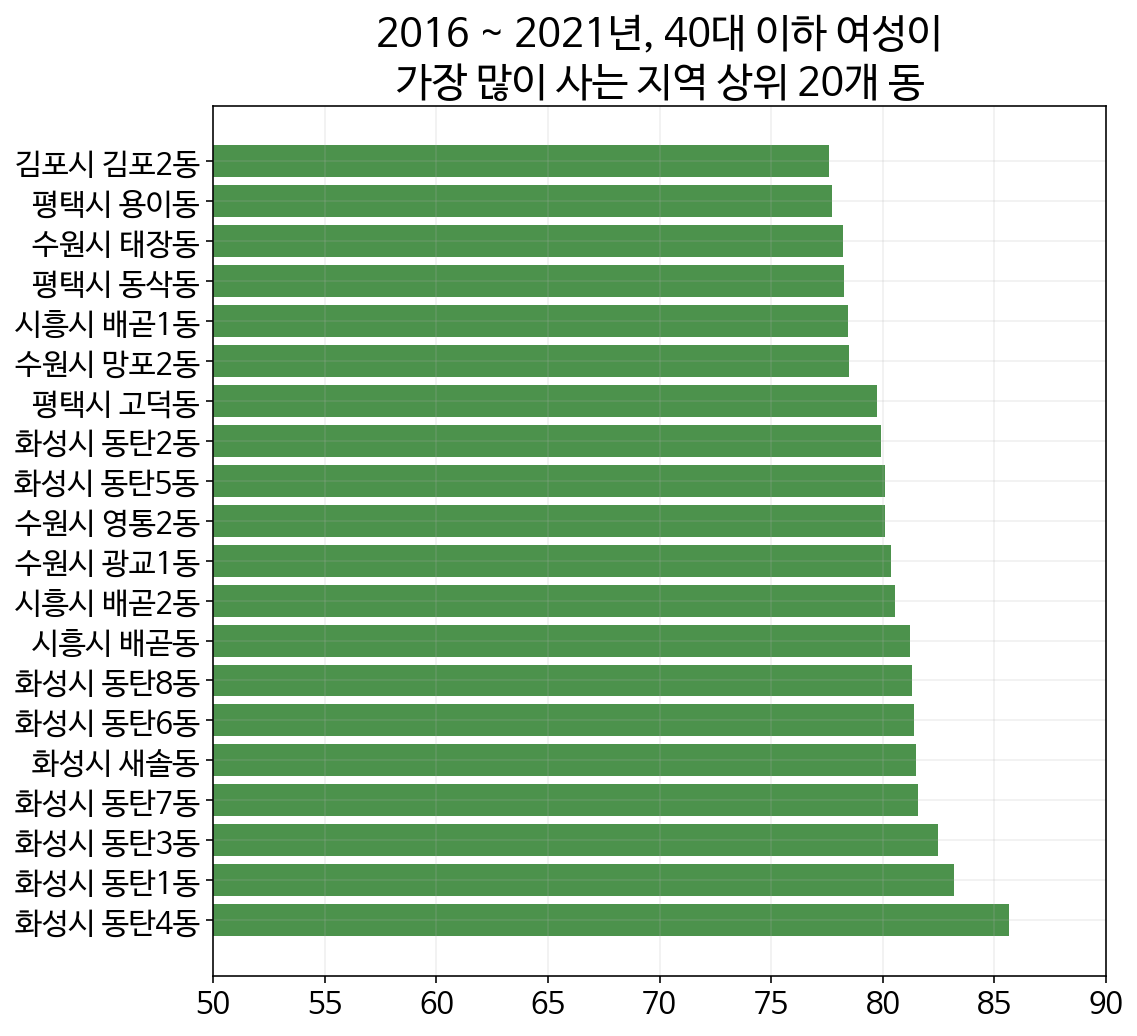

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("2016 ~ 2021년, 40대 이하 여성이\n가장 많이 사는 지역 상위 20개 동", fontsize=20)
plt.barh(x, y, alpha=0.7, color='darkgreen')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(50,90)
plt.grid(True, alpha=0.2)

In [ ]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [ ]:
population = pd.read_csv('./data/Gyeongi_population_data.csv', encoding='euc-kr')
population.fillna(method='pad', inplace=True)

In [ ]:
population.head()

In [ ]:
population.columns

In [ ]:
"""불필요한 칼럼은 삭제한다"""
del population['연도']
del population['월']
del population['행정구역구분명']
del population['총 인구수']
del population['0~9세']
del population['10~19세']
del population['20~29세']
del population['30~39세']
del population['40~49세']
del population['50~59세']
del population['60~69세']
del population['70~79세']
del population['80~89세']
del population['90~99세']
del population['100세 이상']
del population['총 인구수 (남)']
del population['0~9세 (남)']
del population['10~19세 (남)']
del population['20~29세 (남)']
del population['30~39세 (남)']
del population['40~49세 (남)']
del population['50~59세 (남)']
del population['60~69세 (남)']
del population['70~79세 (남)']
del population['80~89세 (남)']
del population['90~99세 (남)']
del population['100세 이상 (남)']

In [ ]:
population.tail()

In [ ]:
"""19세 (여) 까지도 삭제한다"""
del population['총 인구수 (여)']
del population['0~9세 (여)']
del population['10~19세 (여)']
population.head()

In [ ]:
population['20~39세 (여)']=population['20~29세 (여)']+population['30~39세 (여)']
population['65세 이상(여)']=population['40~49세 (여)']+population['50~59세 (여)']+population['60~69세 (여)']+\
                            population['70~79세 (여)']+population['80~89세 (여)']+population['90~99세 (여)']+population['100세 이상 (여)']

In [ ]:
population.head()

In [ ]:
population.columns

In [ ]:
"""필요한 칼럼만 가져온다"""
population_data=population.loc[:,['행정구역명','65세 이상(여)','20~39세 (여)']]
population_data.head()

In [ ]:
population_data['행정구역명']

In [ ]:
"""행정구역이 구로 분류되는 통계만 찾아보자"""
population_data_gu=population_data[population_data['행정구역명'].str.contains('구')]
population_data_gu.head()

In [ ]:
"""행정구역만 따서 리스트에 저장한다"""
add_list=[]
for i in population_data_gu['행정구역명']:
    add_list.append(i)
add_list[:4]

In [ ]:
"""구 정보를 가져온다"""
gu_name=[]

for name in add_list:
    tmp=name.split()
    try:
        gu_name.append(tmp[2])
    except:
        gu_name.append(tmp[1])

In [ ]:
len(add_list), len(gu_name) #서로 배열의 길이가 같다

In [ ]:
population_data_gu['구별']=gu_name
population_data_gu.tail()

In [ ]:
"""1에 가까울수록 젊은 도시에 해당된다."""
population_data_gu['소멸비율'] = population_data_gu['20~39세 (여)'] / (population_data_gu['65세 이상(여)'])
population_data_gu.head()

In [ ]:
"""소멸비율을 내림차순으로 살펴보자"""
population_data_gu=population_data_gu.sort_values(by='소멸비율', ascending=False)
population_data_gu.head(10)

In [ ]:
"""시도와 소멸비율만 남긴다"""
del population_data_gu['행정구역명']
del population_data_gu['65세 이상(여)']
del population_data_gu['20~39세 (여)']
population_data_gu.head()

In [ ]:
"""소멸비율을 기준으로 내림차순 정렬"""
population_data_gu.sort_values(by='소멸비율', ascending=False)

In [ ]:
result_population_gu=population_data_gu.pivot_table(index=['구별'], values=['소멸비율'],aggfunc=np.mean)

In [ ]:
"""인구조사 결과"""
result_population_gu.sort_values(by='소멸비율', ascending=False)

In [ ]:
result_top20=result_population_gu.sort_values(by='소멸비율', ascending=False)[:20]

In [ ]:
result_population_gu['소멸비율']

In [ ]:
result_top20['소멸비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.title("경기도에서 가장 젊은 구 상위 20개", fontdict={'size':15})
plt.xlabel("젊은 비율, 1에 가까울수록 젊음")
plt.show()

In [ ]:
result_top20['소멸비율']